# Discrete-Time Martingales

This notebook explores the main ideas from the theory of **discrete-time martingales**

We cover:

1. Conditional Expectation  
2. Martingales and Sub/Supermartingales  
3. Optional Sampling Theorem  
4. Martingale Convergence  
5. Square-Integrable Martingales  
6. Discrete-Time Stochastic Integrals  
7. Doob's Maximal Inequality  

## 1. Conditional Expectation

Intuitively, the **conditional expectation** $E[Y \mid \mathcal{F}_{n}]$ is the “best” prediction of a random variable $Y$ given only the information available up to time $n$.

---

### Definition

Let $(\Omega,\mathcal{F},P)$ be a probability space and 
$$
\mathcal{F}_n \;\subseteq\;\mathcal{F}
$$ 
a σ-algebra (filtration) representing all information from random variables $X_1,\dots,X_n$. Then $E[Y \mid \mathcal{F}_n]$ is the unique $\mathcal{F}_n$-measurable random variable satisfying  
$$
E\bigl[E[Y \mid \mathcal{F}_n]\,1_A\bigr] \;=\; E\bigl[Y\,1_A\bigr]
\quad
\text{for every }A\in\mathcal{F}_n.
$$

---

### Equivalent Density Definition

If $(X,Y)$ has joint density $f(x,y)$ with marginals $f_X(x)=\int f(x,y)\,dy$, then  
$$
E[Y \mid X=x]
\;=\;
\int_{-\infty}^{\infty} y\,\frac{f(x,y)}{f_X(x)}\,dy,
$$  
so that $E[Y\mid X]$ is a random variable of $X$.

---

### Key Properties

- **Measurability**:  
  $E[Y \mid \mathcal{F}_n]$ is a function of $X_1,\dots,X_n$.

- **Zero‐information**:  
  $E[Y \mid \mathcal{F}_0] = E[Y]$.

- **Averaging (Law of Total Expectation)**:  
  $E\bigl[E[Y \mid \mathcal{F}_n]\bigr] = E[Y]$.

- **Linearity**:  
  $E[aY + bZ \mid \mathcal{F}_n] = a\,E[Y \mid \mathcal{F}_n] + b\,E[Z \mid \mathcal{F}_n]$.

- **Tower Property**:  
  If $m<n$, then  
  $E\bigl[E[Y \mid \mathcal{F}_n]\mid\mathcal{F}_m\bigr] = E[Y \mid \mathcal{F}_m]$.

- **Taking out constants**:  
  If $Z$ is $\mathcal{F}_n$-measurable,  
  $E[Z\,Y \mid \mathcal{F}_n] = Z\,E[Y \mid \mathcal{F}_n]$.

- **Independence**:  
  If $X_1,\dots,X_n$ are independent of $Y$, then  
  $E[Y \mid \mathcal{F}_n] = E[Y]$.

---

### Filtration

A **discrete‐time filtration** $\{\mathcal{F}_n\}_{n\ge0}$ is an increasing sequence of σ-algebras, where $\mathcal{F}_n$ captures all events determined by $X_1,\dots,X_n$.  

---

### Simple Example

For i.i.d. coin‐tosses $Z_i\in\{-1,+1\}$ and $S_n=\sum_{i=1}^n Z_i$, one shows  
$$
E\bigl[S_{n+1}\,\bigm|\,\mathcal{F}_n\bigr] = S_n,
$$  
so $(S_n)$ is itself a martingale.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.conditional_expectation import (
    simulate_coin_tosses,
    build_partial_sums,
    estimate_conditional_expectation,
    estimate_conditional_expectation_sums
)

sns.set_theme(style="whitegrid")
np.random.seed(42)

In [2]:
n_paths, n_steps = 2000, 8
t = 3

In [6]:
tosses = simulate_coin_tosses(n_paths=n_paths, n_steps=n_steps)
S = build_partial_sums(tosses)

hist_est = estimate_conditional_expectation(tosses, t)
sum_est = estimate_conditional_expectation_sums(S, t)

In [7]:
print("E[Z_{t+1} | history]  (first 5):")
for i, (h, v) in enumerate(hist_est.items()):
    print(f"  {h} → {v:.3f}")
    if i == 4: break

print("\nE[S_{t+1} | S_t] (sorted by S_t):")
for s, v in sorted(sum_est.items()):
    print(f"  S_t = {s:2d} → {v:.3f}")

E[Z_{t+1} | history]  (first 5):
  (np.int64(1), np.int64(1), np.int64(1), np.int64(-1)) → 0.015
  (np.int64(-1), np.int64(-1), np.int64(1), np.int64(1)) → -0.055
  (np.int64(1), np.int64(-1), np.int64(-1), np.int64(1)) → -0.048
  (np.int64(-1), np.int64(1), np.int64(-1), np.int64(1)) → -0.056
  (np.int64(1), np.int64(1), np.int64(-1), np.int64(1)) → -0.029

E[S_{t+1} | S_t] (sorted by S_t):
  S_t = -4 → -4.109
  S_t = -2 → -1.962
  S_t =  0 → -0.023
  S_t =  2 → 2.036
  S_t =  4 → 4.157


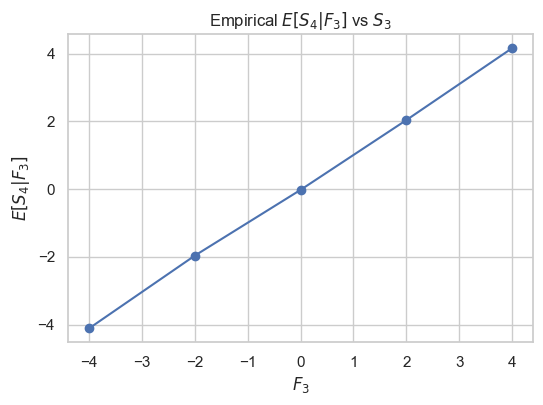

In [11]:
x, y = zip(*sorted(sum_est.items()))

plt.figure(figsize=(6,4))
plt.plot(x, y, marker='o')
plt.title(f"Empirical $E[S_{{{t+1}}} | F_{{{t}}}]$ vs $S_{t}$")
plt.xlabel(f"$F_{t}$")
plt.ylabel(f"$E[S_{{{t+1}}} | F_{{{t}}}]$")
plt.grid(True)
plt.show()